In [1]:
#installing all the libraries since I code on Colab, ignore this part if you are doing it on jupyterlab/VSCode
!pip install alpaca-trade-api
!pip install pandas
!pip install pandas_ta
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for msgpack: filename=msgpack-1.0.3-cp311-cp311-linux_x86_64.whl size=15688 sha256=7745a160202d0c0d7f354f5d9a941518c4e428c493c9f54d410a4a5b22719b7c
  Stored in directory: /root/.cache/pip/wheels/f6/35/da/ed9b26b510235e00e3a3c3bab7bad97b59214729662255ab3d
Successfully built msgpack
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.1.0
    Uninstalling msgpack-1.1.0:
      Successfully uninstalled msgpack-1.1.0
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling w

In [2]:
#importing the libraries installed
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf

In [16]:
#Loading Alpaca API keys
API_Key = "PKRFUQSXUDG18L40J1VG" #Nathan's Key
API_secret_key = "2XAyzllnBZhxY8BSv8o1xkfzw3pHgIIbQsGwr7jp" #Nathan's secret Key
API_base_url = "https://paper-api.alpaca.markets" #(for live account trading, just remove the 'paper' from this link and it would work the same)

In [17]:
#initializing Alpaca API on our collab environment
api = tradeapi.REST(API_Key, API_secret_key, API_base_url, api_version='v2')

In [18]:
#function to fetch historical data with a date range, for the sake of trying it out the first time, I went with December 1st till 28th of February, approximately 90 days at first but kept increasing the time frame looking for more buying signals. Ended up at 9 years or historical data.

def fetch_data(symbol, start, end, timeframe='1D'):
  start = '2025-01-01'
  end = '2025-02-01'
  barset = api.get_bars(symbol, timeframe, start=start, end=end, feed = 'iex')
  bars = list(barset)
  return bars

In [22]:
#Get Vanguard Info
bars = fetch_data('VOO', '2025-01-01', '2025-02-01')
print(bars)

[Bar({   'c': 537.06,
    'h': 543.36,
    'l': 534,
    'n': 1914,
    'o': 541.92,
    't': '2025-01-02T05:00:00Z',
    'v': 107710,
    'vw': 538.885116}), Bar({   'c': 544.32,
    'h': 544.79,
    'l': 539.76,
    'n': 833,
    'o': 540.275,
    't': '2025-01-03T05:00:00Z',
    'v': 37530,
    'vw': 543.280073}), Bar({   'c': 547.27,
    'h': 551.41,
    'l': 546.27,
    'n': 1591,
    'o': 548.695,
    't': '2025-01-06T05:00:00Z',
    'v': 124454,
    'vw': 548.716529}), Bar({   'c': 541.35,
    'h': 549.43,
    'l': 539.65,
    'n': 1424,
    'o': 549.42,
    't': '2025-01-07T05:00:00Z',
    'v': 78983,
    'vw': 543.278189}), Bar({   'c': 541.77,
    'h': 542.2,
    'l': 538.345,
    'n': 805,
    'o': 540.42,
    't': '2025-01-08T05:00:00Z',
    'v': 26369,
    'vw': 540.727522}), Bar({   'c': 533.67,
    'h': 538.71,
    'l': 532.165,
    'n': 1983,
    'o': 538.7,
    't': '2025-01-10T05:00:00Z',
    'v': 109435,
    'vw': 534.204735}), Bar({   'c': 534.7,
    'h': 534.815,
 

In [23]:
data = {
    'Date': [bar.t for bar in bars],
    'Open': [bar.o for bar in bars],
    'High': [bar.h for bar in bars],
    'Low': [bar.l for bar in bars],
    'Close': [bar.c for bar in bars],
    'Volume': [bar.v for bar in bars]
}

In [24]:
#creating dataframe and setting index
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02 00:00:00-05:00,541.920,543.360,534.000,537.06,107710
2025-01-03 00:00:00-05:00,540.275,544.790,539.760,544.32,37530
2025-01-06 00:00:00-05:00,548.695,551.410,546.270,547.27,124454
2025-01-07 00:00:00-05:00,549.420,549.430,539.650,541.35,78983
2025-01-08 00:00:00-05:00,540.420,542.200,538.345,541.77,26369
2025-01-10 00:00:00-05:00,538.700,538.710,532.165,533.67,109435
2025-01-13 00:00:00-05:00,529.360,534.815,529.230,534.70,83402
2025-01-14 00:00:00-05:00,537.295,537.840,531.840,535.32,100660
2025-01-15 00:00:00-05:00,542.540,546.115,542.200,545.19,47028


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

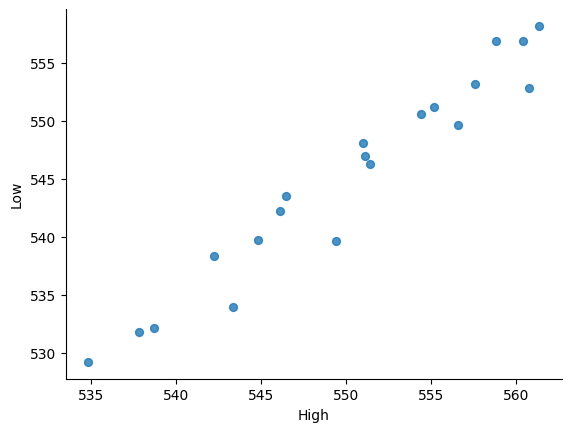

In [25]:
#test graph for fun
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)